In [2]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#from sklearn.preprocessing import Imputer
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Advertising.csv',sep=',')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
#we can drop "Unnamed: 0" column as it is just a Serial number
df.drop(columns=["Unnamed: 0"],inplace=True)

# Data Exploration (exploratory data analysis or EDA)

In [5]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#lets check the datatypes
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
#To check the shape of the dataset
df.shape # (rows, columns)

(200, 4)

In [8]:
#features in data
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
#data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
#Lets describe the dataset
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


mean is higher than the median, which means  data is right skewed and ouliers are present

In [11]:
# Are there any missing values?
df.isna().sum()


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of TV : 190
number of unique valuse of radio : 167
number of unique valuse of newspaper : 172
number of unique valuse of sales : 121


In [13]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


sales is significantly correlated with TV and having least correlation  with newspaper


# Univarient  analysis

In [14]:
print("Value Count of sales Column")
print(df.sales.value_counts())
print("\nPercentage of sales Column")
print(df.sales.value_counts(normalize = True))

Value Count of sales Column
9.7     5
12.9    4
11.7    4
15.9    4
25.4    3
       ..
15.7    1
14.2    1
11.2    1
19.4    1
18.5    1
Name: sales, Length: 121, dtype: int64

Percentage of sales Column
9.7     0.025
12.9    0.020
11.7    0.020
15.9    0.020
25.4    0.015
        ...  
15.7    0.005
14.2    0.005
11.2    0.005
19.4    0.005
18.5    0.005
Name: sales, Length: 121, dtype: float64


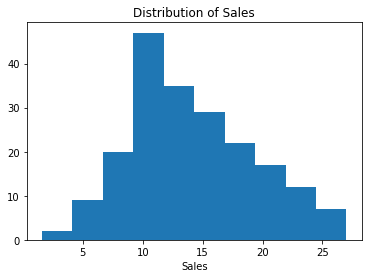

In [15]:
# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['sales'])
plt.xlabel('Sales')
plt.title('Distribution of Sales')

plt.show()

We can see it's a normal distribution



TV              AxesSubplot(0.125,0.749828;0.227941x0.130172)
radio        AxesSubplot(0.398529,0.749828;0.227941x0.130172)
newspaper    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
sales           AxesSubplot(0.125,0.593621;0.227941x0.130172)
dtype: object

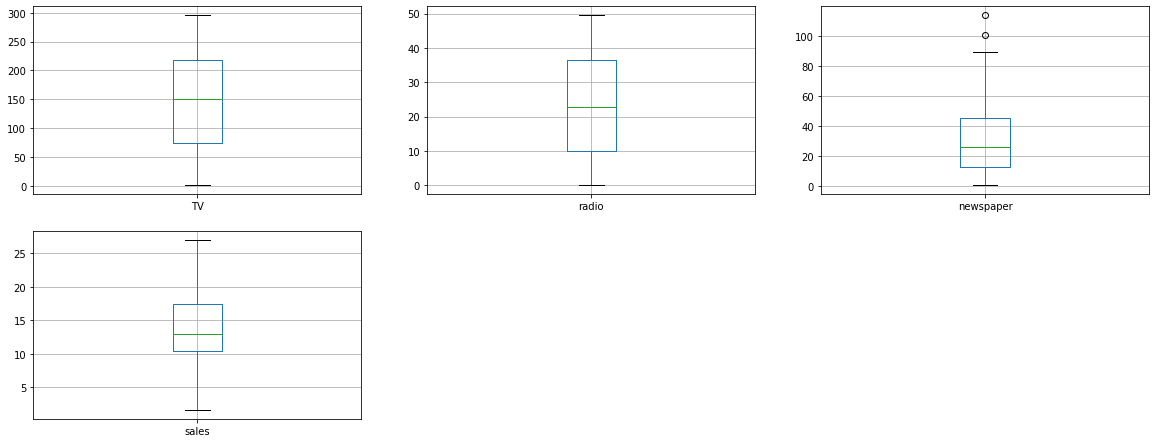

In [16]:
# Plotting the boxplot in order to check and visualize outliers
df.plot(kind='box', subplots=True, layout=(5,3),figsize=(20,20),grid=True,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C9B88888>,
      dtype=object)

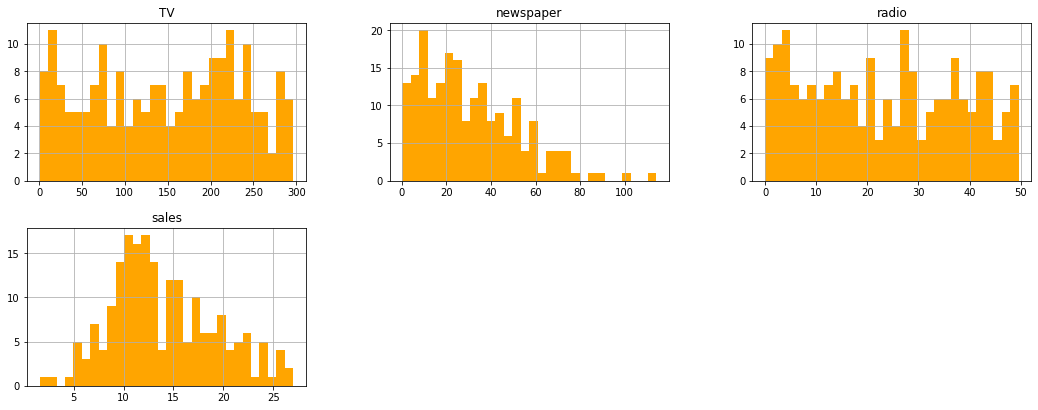

In [17]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(5,3),bins=30,color='orange')

# Bivariate analysis

<Figure size 1440x360 with 0 Axes>

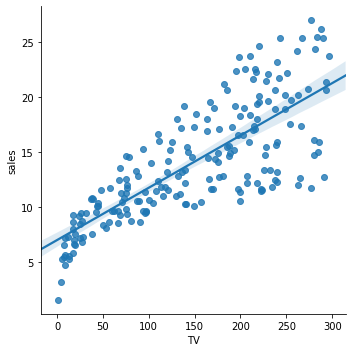

<Figure size 1440x360 with 0 Axes>

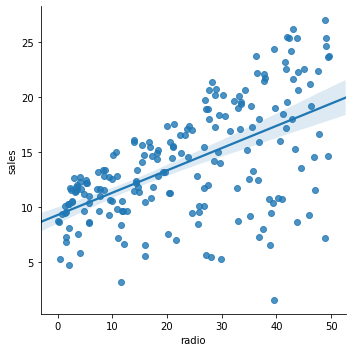

<Figure size 1440x360 with 0 Axes>

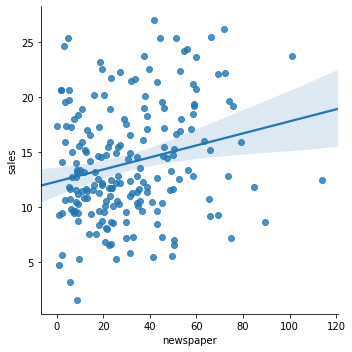

In [18]:
#lets check in which channel average sales is more

m=df.drop(['sales'],axis=1).columns.values
for i in m:
    plt.figure(figsize=(20,5))
    sns.lmplot(x=i,y="sales",data=df);
    plt.tight_layout()
    


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

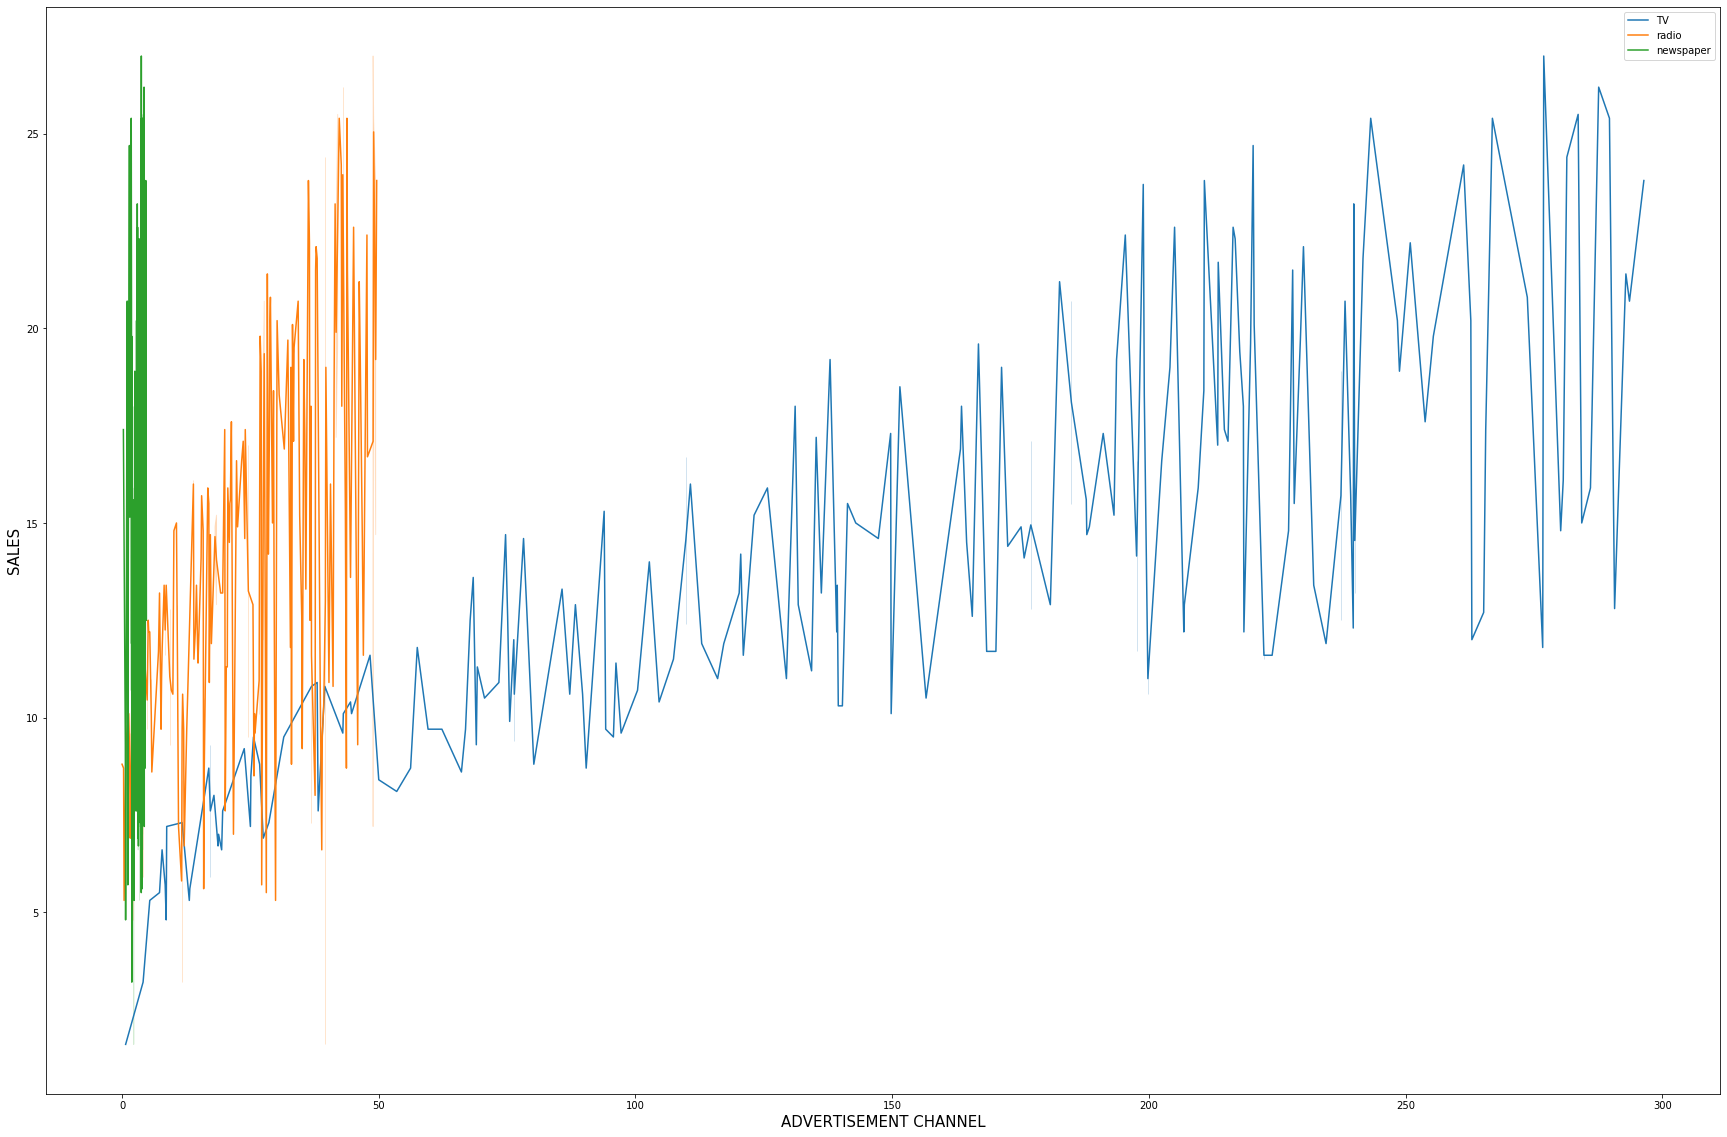

In [65]:
#plt of sales vs channel
s=df.drop(['sales'],axis=1).columns.values
plt.figure(figsize=(30,20))
sns.lineplot(x='TV',y='sales',data=df)
sns.lineplot(x='radio',y='sales',data=df)
sns.lineplot(x='newspaper',y='sales',data=df)
plt.legend(s)
plt.ylabel('SALES' ,fontsize=15)
plt.xlabel('ADVERTISEMENT CHANNEL' ,fontsize=15)
plt.tight_layout

Company is spending more money in TV advertisement which result in higher sales as compared to radio and newspaper


In [20]:
df.groupby('sales')[df.drop(['sales'],axis=1).columns.values].mean()

,TV,radio,newspaper
sales,,,
1.6,0.70,39.600000,8.7
3.2,4.10,11.600000,5.7
4.8,8.60,2.100000,1.0
5.3,9.25,15.150000,17.5
5.5,7.30,28.100000,41.4
...,...,...,...
24.7,220.30,49.000000,3.2
25.4,266.60,45.033333,33.5
25.5,283.60,42.000000,66.2


1)Spending more money in radio and newspaper as compared to tv  advertisement generates less sales.,
2)Spending more money in tv ,little less than tv  in radio and very low in newspaper  advertisement generates more sales.


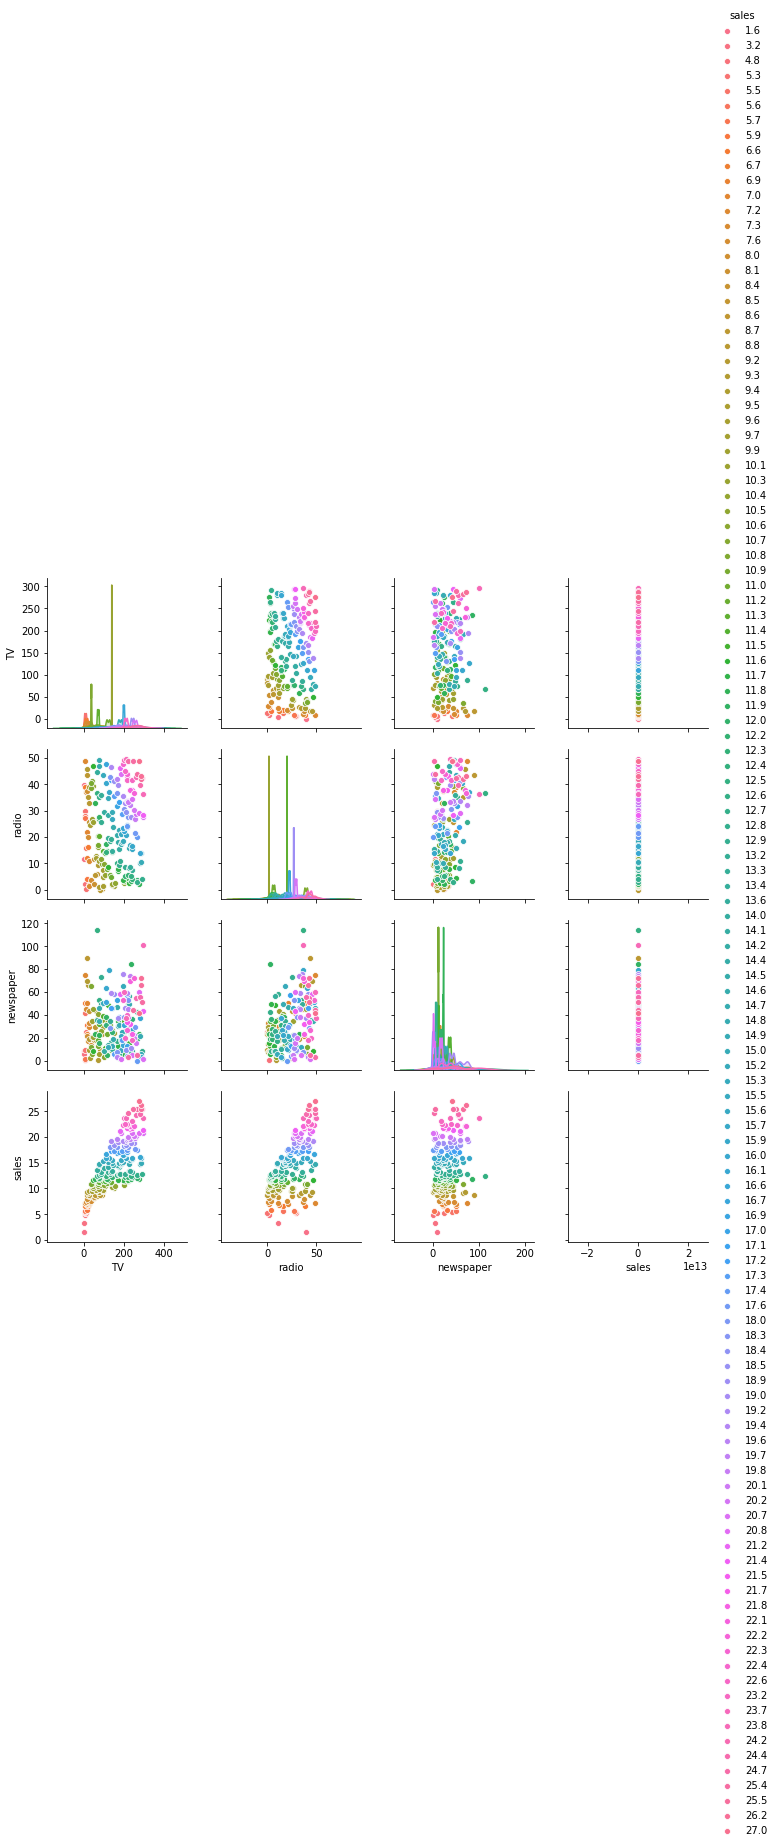

In [21]:
#lets draw pairplot
sns.pairplot(df,hue='sales')

In [22]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [23]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [24]:
#lets again check the skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.799875
sales        0.407571
dtype: float64

In [26]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_sales=df.loc[(z<3).all(axis=1)]
print(df_sales.shape)

(200, 4)
(199, 4)


In [27]:
#lets again check the skewness after removing outliers
df_sales.skew()

TV          -0.063150
radio        0.090691
newspaper   -0.717354
sales        0.416327
dtype: float64

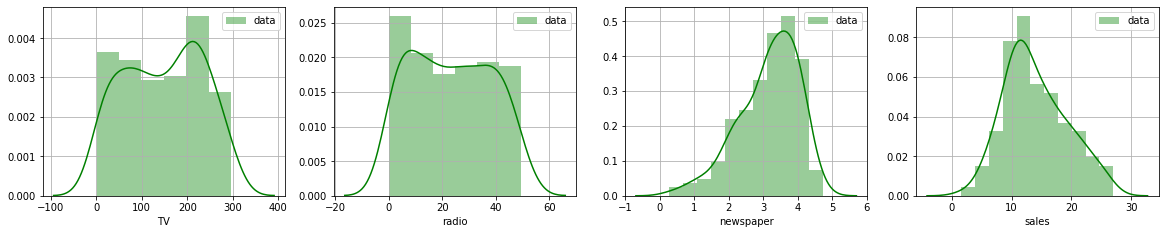

In [68]:
# Checking the Normal Distribution using distplot after removing skewness and outliers
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_sales.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

(4.0, 0.0)

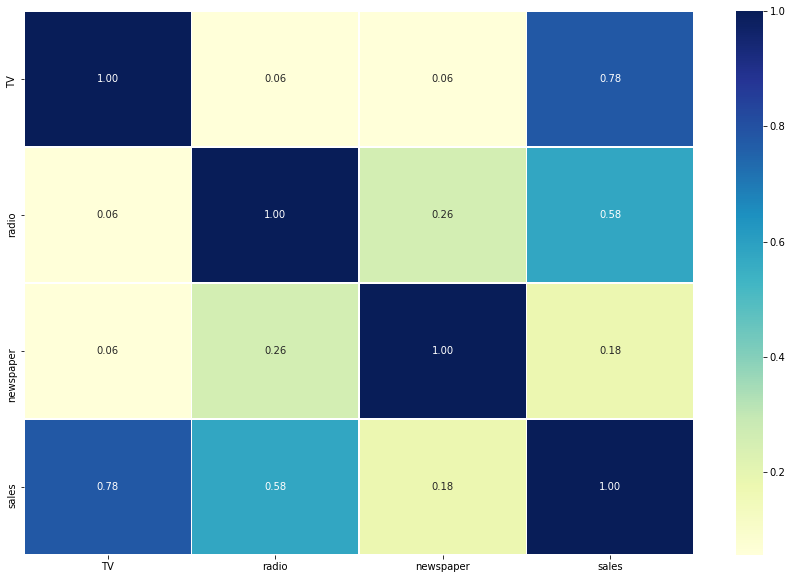

In [28]:
# Plotting Heatmap for Correlation
corr_matrix = df_sales.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling


In [29]:
# Split data into X and y
X = df_sales.drop("sales", axis=1)

y = df_sales["sales"]

In [30]:
# Independent variables (no target column)
X.head()

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294


In [31]:
# Target variable
y


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 199, dtype: float64

In [32]:
#checking shape of input variable
X.shape

(199, 3)

In [33]:
#checking shape of target variable
y.shape

(199,)

In [34]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,TV,radio,newspaper
0,0.979090,0.978080,1.287306
1,-1.193199,1.079124,0.787741
2,-1.512722,1.523719,1.288997
3,0.059144,1.213850,1.090856
4,0.402076,-0.840714,1.088858
...,...,...,...
194,-1.266935,-1.318990,-0.561964
195,-0.611503,-1.238155,-1.139716
196,0.357600,-0.941758,-1.385372
197,1.605262,1.261004,1.235424


In [35]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [36]:
models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [37]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 61 is: 0.948735978326691
max r2 score corresponding to 42 is: 0.9657600636119191
max r2 score corresponding to 70 is: 0.9412690928757161
max r2 score corresponding to 60 is: 0.9809086931947003
max r2 score corresponding to 76 is: 0.8976150666466532
max r2 score corresponding to 50 is: 0.9899317502120175
max r2 score corresponding to 64 is: 0.876997421834516
max r2 score corresponding to 70 is: 0.940566375498839
max r2 score corresponding to 64 is: 0.7899474342604718
max r2 score corresponding to 76 is: 0.9859263462827064


{'KNeighborsRegressor': 0.8793086656532796,
 'SVR': 0.9120464937478452,
 'LR': 0.8851971315359388,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.8550757057151084,
 'GradientBoostingClassifier': 0.9990176222579797,
 'Lasso': 0.8365907866109721,
 'Ridge': 0.8851580296192136,
 'ElasticNet': 0.7512908108280184,
 'XGBRegressor': 0.9999999226120296}

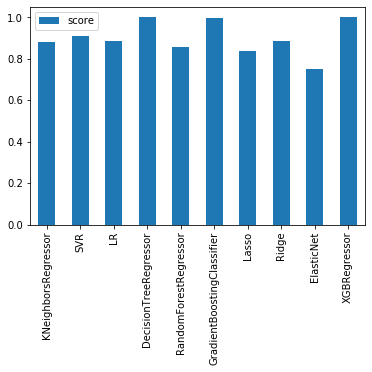

In [38]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [39]:
#           Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 61 is: 0.9723962148619395
R2 Score :  0.9664979277860529


Cross_val_score= 0.9319386635982703


Mean absolute error= 0.6469999999999999


Mean squared error= 0.713673333333333


Root Mean squared error= 0.8447918875873117


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 42 is: 0.9657600636119191
R2 Score :  0.9226254214217429


Cross_val_score= 0.8959231717496241


Mean absolute error= 0.7387101228516102


Mean squared error= 1.6251367462390383


Root Mean squared error= 1.2748085135576395


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 70 is: 0.9412690928757161


In [40]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,96.649793,93.193866,64.700000,71.367333,84.479189
1,SVR,92.262542,89.592317,73.871012,162.513675,127.480851
2,LinearRegression,92.436640,88.720056,110.579103,185.722063,136.279882
3,DecisionTreeRegressor,96.285078,95.569488,80.166667,125.783333,112.153169
4,RandomForestRegressor,96.582826,97.472285,69.100000,94.008000,96.957723
5,GradientBoostingRegressor,98.219394,97.705784,47.041204,38.499130,62.047667
6,AdaBoostRegressor,96.520755,95.246455,82.427982,104.927799,102.434271
7,Lasso,81.609686,81.755669,150.087157,473.997255,217.714780
8,Ridge,92.435417,88.727767,110.894565,185.752100,136.290902
9,ElasticNet,72.845650,73.327624,192.685223,699.884068,264.553221


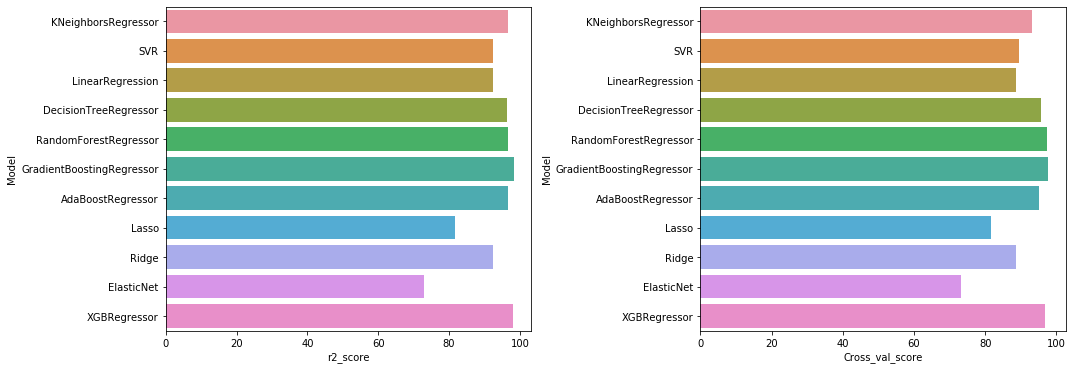

In [41]:
#Plotting bar plot of scores of various models
#plotting of students marks in each subject with respect to student name
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()

In [42]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

In [43]:
#for getting best set of parameters for DecisionTreeRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

clfD = DecisionTreeRegressor()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x, y);

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 615 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1470 out of 1470 | elapsed:    4.9s finished


In [44]:
# best parameters for DecisionTreeRegressor
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'max_leaf_nodes': 72, 'min_samples_split': 2}
score: 0.9604918248122798


In [45]:
#checking r2 score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeRegressor(max_leaf_nodes=60, min_samples_split= 4)
max_random_score(dtc)

max r2 score corresponding to 60 is: 0.977102360241373


60

In [46]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  80 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.5s finished


In [47]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 1000}
score: 0.9780696190705546


In [48]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators= 1000)
max_random_score(gbr)

max r2 score corresponding to 43 is: 0.9895906376922232


43

In [49]:
#for getting best set of parameters for SVR we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid2 = { 'gamma': [1e-3, 1e-4,1e-5],
                     'C': [1, 10, 100, 1000],
         'kernel':['rbf','poly','linear']
         }
clfD = SVR()

# Setup GridSearchCV
gs_clf2 = GridSearchCV(estimator=clfD,
                      param_grid=grid2,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf2.fit(x, y);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.6s finished


In [50]:
# best parameters for SVR
print("Best parameter:",gs_clf2.best_params_)
print("score:",gs_clf2.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.9237373867017753


In [51]:
#checking r2 score using best parameters which calculated from gridsearchCV
svr=SVR(C=1000, gamma= 0.001,kernel='rbf')
max_random_score(svr)

max r2 score corresponding to 61 is: 0.9694428453112238


61

In [52]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x, y);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   23.6s finished


In [53]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
score: 0.9757007088413145


In [54]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=500,max_depth=10, min_samples_leaf= 1, max_features= 'auto',min_samples_split=4)
max_random_score(rf)

max r2 score corresponding to 57 is: 0.9859977555391818


57

In [55]:
#using AdaBoostClassifier base_estimator as RandomForestRegressor
rm = RandomForestRegressor(n_estimators=500, random_state=57)
ada_rm=AdaBoostRegressor(base_estimator=rm,learning_rate=0.01,n_estimators=10)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 97.57%
Mean absolute error: 0.66
Mean squared error: 0.67
Root Mean squared error: 0.82


{'r2score': 0.98,
 'Mean absolute error': 0.66,
 'Mean squared error': 0.67,
 'Root Mean squared error': 0.82}

# After all this process conclusion is that GradientBoostingRegressor is performing well.


In [56]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.22,random_state=50)
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predgbr = gbr.predict(x_test)
evaluate_preds(y_test,y_predgbr)


r2score: 99.03%
Mean absolute error: 0.33
Mean squared error: 0.19
Root Mean squared error: 0.43


{'r2score': 0.99,
 'Mean absolute error': 0.33,
 'Mean squared error': 0.19,
 'Root Mean squared error': 0.43}

Text(0, 0.5, 'Predicted Y')

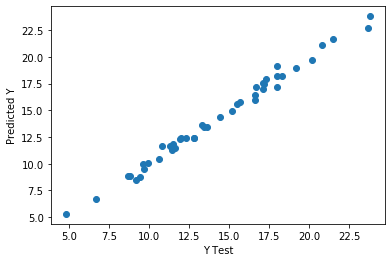

In [66]:
plt.scatter(x=y_test,y=y_predgbr)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Here we can see that we nearly have a straight line, in other words its better than the Linear regression model

In [57]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predgbr})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
199,13.4,13.421597
24,9.7,9.488674
161,13.3,13.617455
20,18.0,19.153733
55,23.7,22.723868
197,12.8,12.441338
168,17.1,16.981889
8,4.8,5.321344
189,6.7,6.716242
40,16.6,16.436646


In [58]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predgbr)
df1.to_csv('Project6_Sales_Channel_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (Sales)

In [59]:
# Find feature importance of our best model
gbr.feature_importances_

array([0.65319841, 0.34580577, 0.00099583])

In [60]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

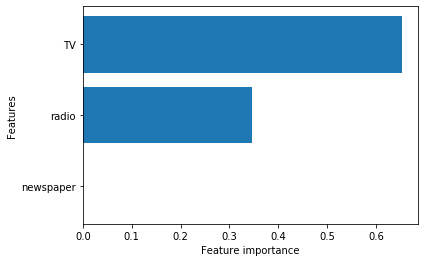

In [61]:
#bar plot of important features 
plot_features(x_train.columns, gbr.feature_importances_)
#Looks like TV contribute the most.

In [62]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(gbr,'Project6_Sales_Channel_submission.pkl')

['Project6_Sales_Channel_submission.pkl']

In [63]:
#read the file using joblib
gbr_from_joblib=joblib.load('Project6_Sales_Channel_submission.pkl')
joblib_y_preds = gbr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 99.03%
Mean absolute error: 0.33
Mean squared error: 0.19
Root Mean squared error: 0.43


{'r2score': 0.99,
 'Mean absolute error': 0.33,
 'Mean squared error': 0.19,
 'Root Mean squared error': 0.43}

# Conclusion